In [2]:
!jupytext --to py ab-selection.ipynb

[jupytext] Reading ab-selection.ipynb in format ipynb
[jupytext] Writing ab-selection.py


# Making a representative data sample from a huge dataset 
Author: Bazman, 2020

In [1]:
from sklearn.manifold import TSNE
from sklearn.base import BaseEstimator
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np
import scipy
pd.set_option('display.max_rows', 600)

In [25]:
class MultiDimDataset(BaseEstimator):
    import numpy as np
    import plotly.express as px
    from sklearn.cluster import KMeans
    '''
    class to generate and hold multi-dimentional dataset from random variables of normal distribution
    loc - array of cluster centers
    scale - array of corresponding std deviation
    uses normal distribution
    attributes:
    data - pandas dataframe that holds the data
    
    '''
    def __init__(self, loc, scale, size=100):
        assert len(loc) == len(scale)
        # dimensionality of the data
        self.dim = len(loc[0])
        # number of clusters == number of centers
        self.n_clusters = len(loc)
        self.size = size
        self.loc = loc
        self.scale = scale
        # make empty dataframe
        self.data = pd.DataFrame(columns=[f'x{i}' for i in range(len(loc[0]))])
        #sampled data - initially not defined
        self.sample = None
        self.tsne = TSNE(n_components=2, init='pca', metric='minkowski', perplexity=100, n_jobs=1)
        
        for l,s in zip(self.loc, self.scale):
            self.data = self.data.append(pd.DataFrame(np.random.normal(loc=l, scale=s, size=(size, self.dim)), columns=[f'x{i}' for i in range(self.dim)]))
        self.data.reset_index(drop=True, inplace=True)
        
        self.km_ = KMeans(n_clusters=self.n_clusters, n_jobs=-1).fit(self.data)
        self.data['cluster'] = self.km_.labels_
    
    def plot_data(self, sample=False):
        '''
        display a sample of full data with plot.ly
        '''
        if sample and self.sample is not None:
            data = self.data.loc[self.sample]
            color = self.data.loc[self.sample, 'cluster']
        elif sample and self.sample is None:
            print('Sample not defined, exiting.')
            return -1
        elif not sample:
            data = self.data
            color = self.data['cluster']
        
        if data.shape[0]<10000 :
            fig = px.scatter_matrix(data, dimensions=self.data.columns[:-1], color=color)
            fig.show()
        else:
            print('Sorry - data too large. Can only handle 10,000 points')
    
    def cluster_quality_check(self):
        print(self.data['cluster'].value_counts(),'\n')
        
        for i in range(self.n_clusters):
            print(self.data.loc[i*self.size:(i+1)*self.size,'cluster'].value_counts())
    
    def generate_samples(self, fraction=0.1):
        '''
        make a stratified selection from the data
        '''
        from sklearn.model_selection import StratifiedKFold
        skf = StratifiedKFold(n_splits=round(1/fraction), shuffle=True)
        _, idx = next(skf.split(self.data.iloc[:,:-1], self.data.iloc[:,-1]))
        self.sample = idx
    
    def fit(self, X=None, y=None):
        '''
        fit tsne to the data
        '''
        self.tsne.fit(cluster_data.data.iloc[:,:-1])
        self.embedding = pd.DataFrame(self.tsne.embedding_, columns=['e1', 'e2'])
    
    def plot_embedding(self, sample=False):
        '''
        plot embedding for full data or for sample 
        '''
        if sample and self.sample is not None:
            data = self.embedding.loc[self.sample]
            color = self.data.loc[self.sample, 'cluster']
        elif sample and self.sample is None:
            print('Sample not defined, exiting.')
            return -1
        elif not sample:
            data = self.embedding
            color = self.data['cluster']
        
        fig = px.scatter(data, x='e1', y='e2', color=color)
        fig.show()

In [23]:
cluster_data = MultiDimDataset(loc=[(0,5,10), (2,-5,7), (1,4,4), (4,9,5)],
                               scale=[(1,2,3),(2,1.5,3),(3,2,0.5), (3,2,4)],size=5000)

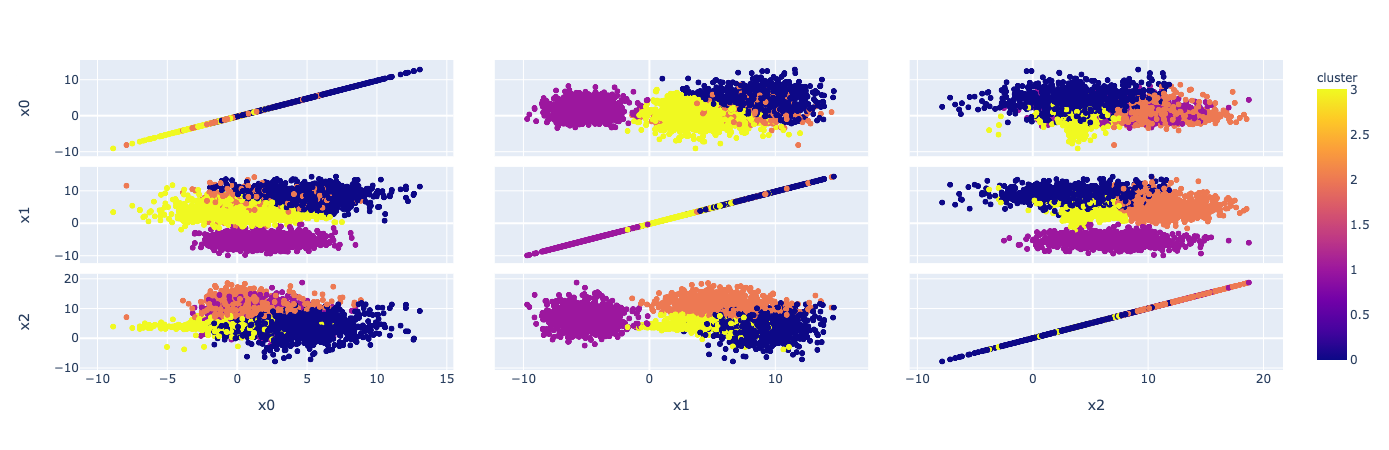

In [11]:
cluster_data.plot_data()

In [20]:
cluster_data.cluster_quality_check()

3    5814
1    5036
2    4622
0    4528
Name: cluster, dtype: int64 

2    3813
3    1134
0      36
1      18
Name: cluster, dtype: int64
1    4983
3      13
2       4
0       1
Name: cluster, dtype: int64
3    4251
0     714
1      36
Name: cluster, dtype: int64
0    3779
2     805
3     416
Name: cluster, dtype: int64


In [26]:
%%time
cluster_data.fit()

CPU times: user 19min 8s, sys: 18 s, total: 19min 26s
Wall time: 1min 16s


from scipy.spatial.distance.pdist
'braycurtis', 'canberra', 'chebyshev', 'cityblock',
    'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'

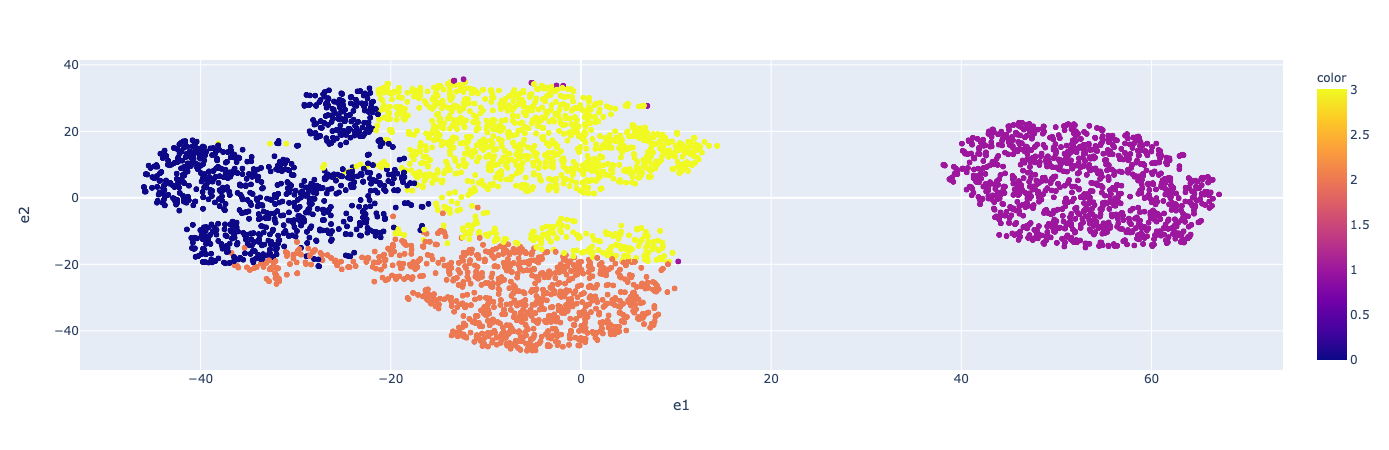

In [14]:
cluster_data.plot_embedding()

In [15]:
cluster_data.generate_samples()

In [16]:
cluster_data.sample.shape

(400,)

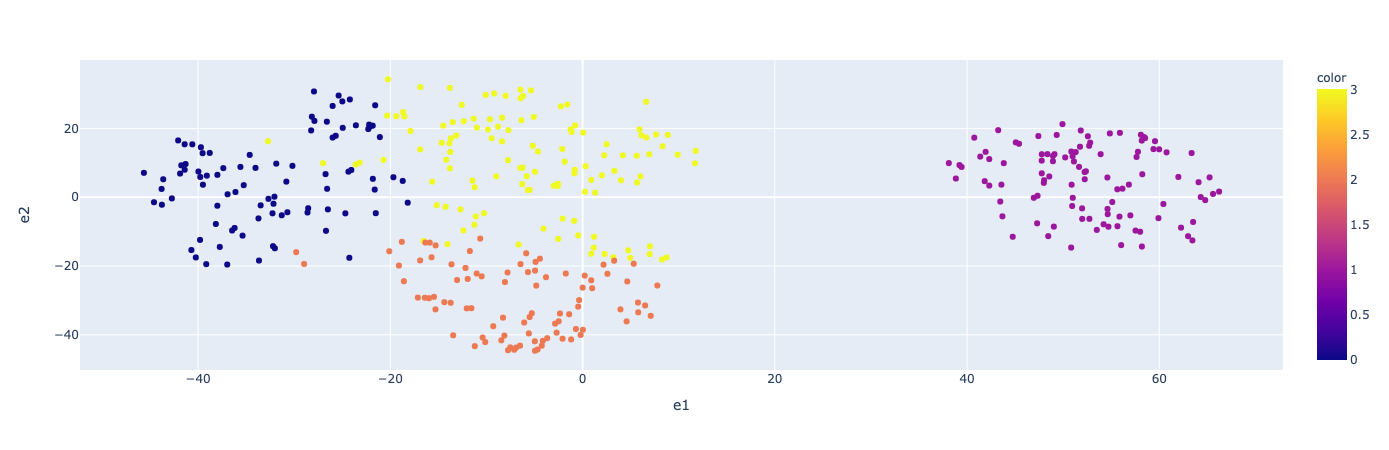

In [17]:
cluster_data.plot_embedding(True)

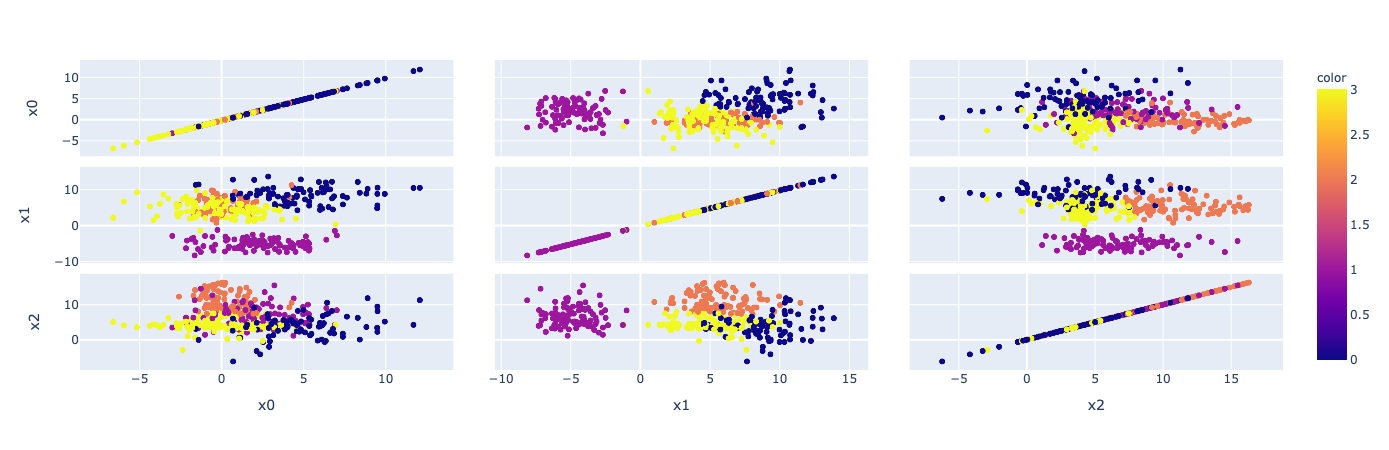

In [18]:
cluster_data.plot_data(sample=True)